# Purcell Strokes

In this notebook, we'll determine Purcell strokes for a number of $(\eta,\phi)$ pairs.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import stokeslets as slts
import purcell as pur
%matplotlib inline
import seaborn as sns; sns.set(); sns.set_style("whitegrid");

In [2]:
figfile = "figs/"

## Deriving $P_0$

Let's optimise the Purcell swimmer using bisection method. We can verify whether the swimmer performs Purcell strokes for the derived $P_0$ with $\theta_1$ vs. $\theta_2$ plots.

In [3]:
Phi = np.arange(np.pi/48,np.pi/2,np.pi/48) #restricting to the non-interacting regime
Eta = np.array([2,1.8,2.2])
Tau = pd.DataFrame(np.zeros(np.shape(np.meshgrid(Phi,Eta)[0])),index=Eta, columns=Phi)

angle:0.07


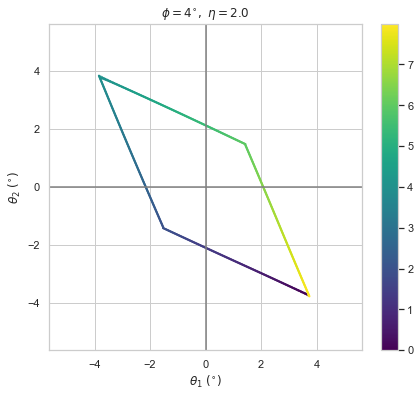

angle:0.13


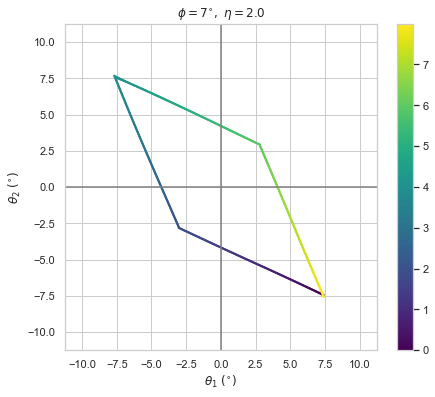

angle:0.2


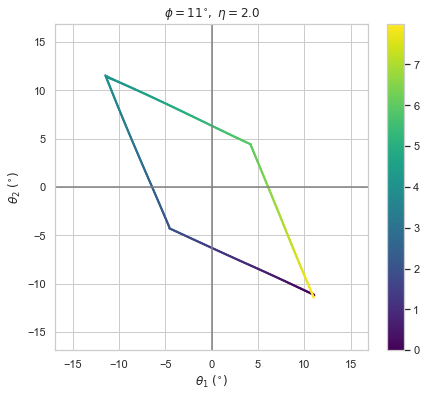

angle:0.26


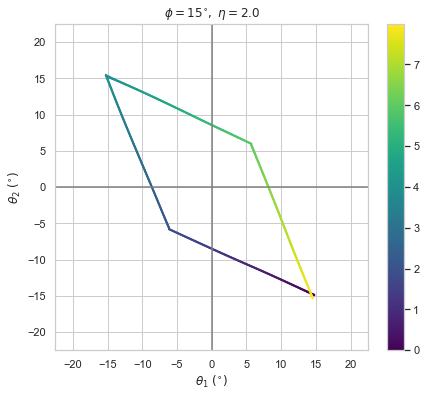

angle:0.33


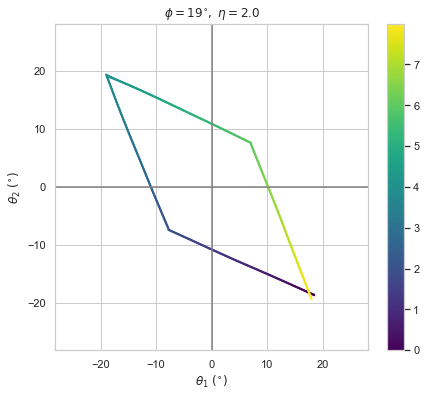

angle:0.39


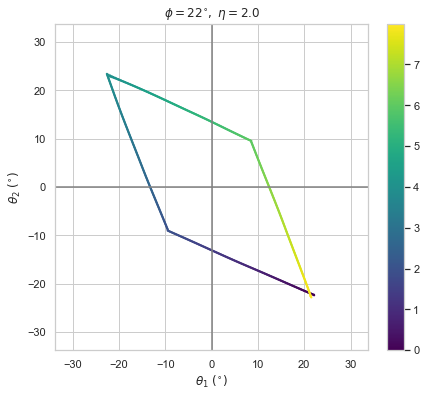

angle:0.46


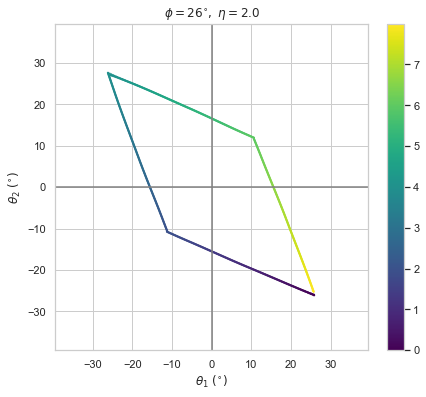

angle:0.52


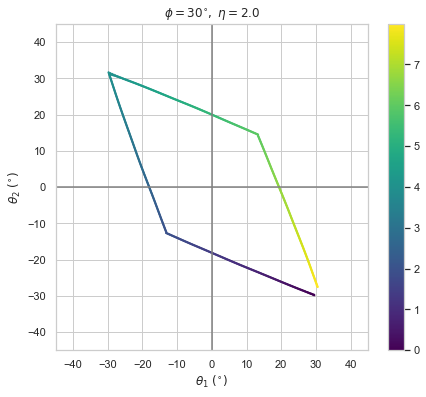

angle:0.59


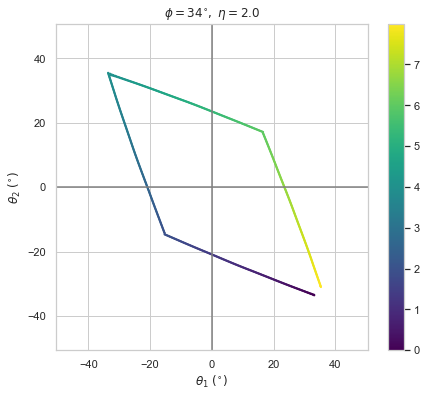

angle:0.65


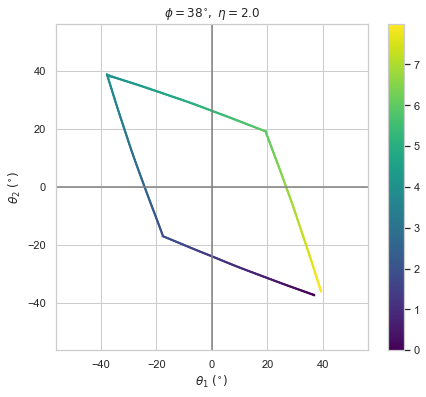

angle:0.72


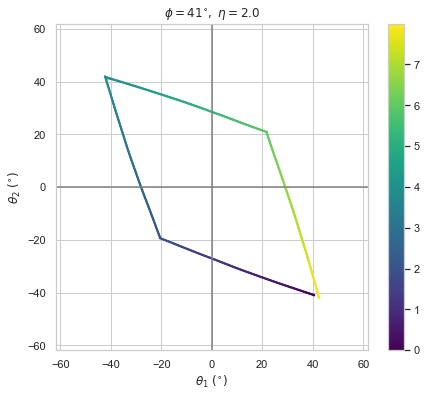

angle:0.79


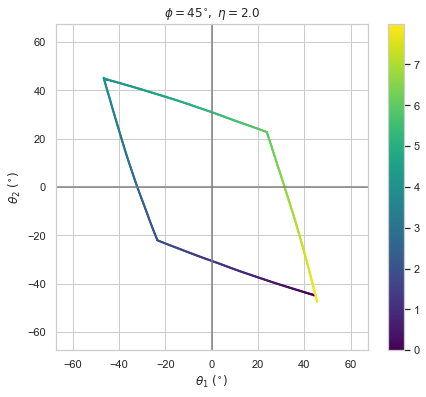

angle:0.85


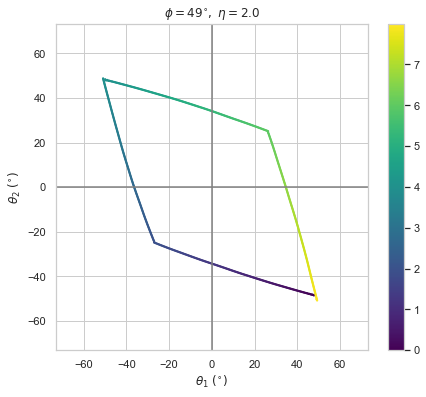

angle:0.92


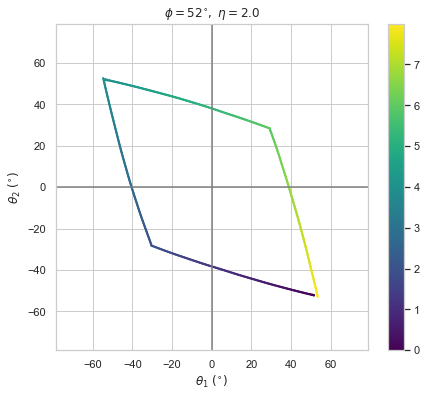

angle:0.98


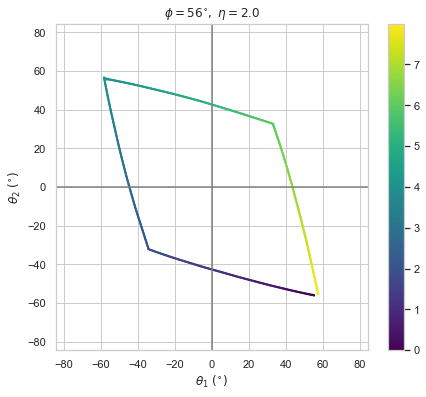

angle:1.05


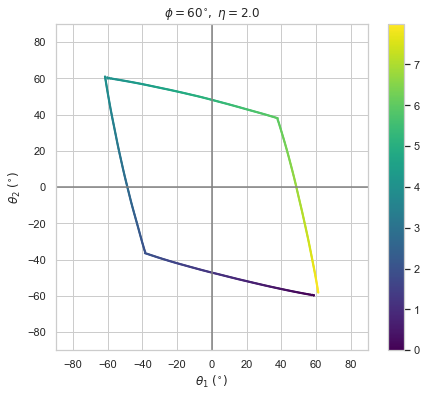

angle:1.11


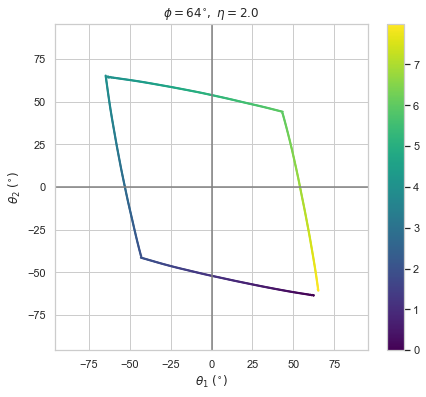

angle:1.18


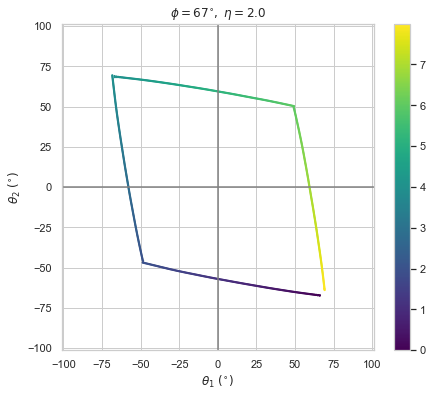

angle:1.24


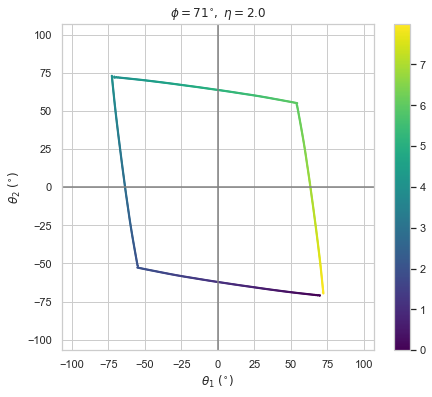

angle:1.31


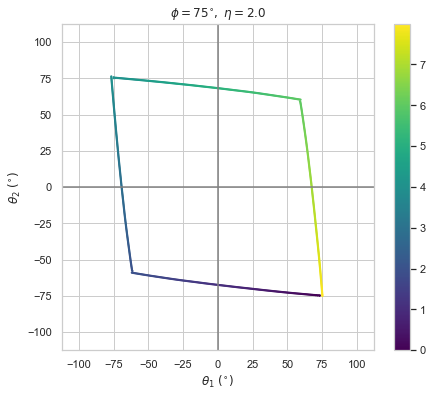

angle:1.37


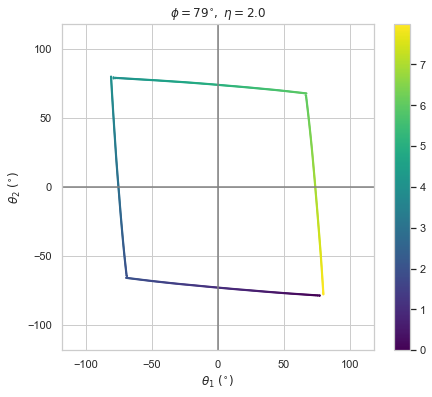

angle:1.44


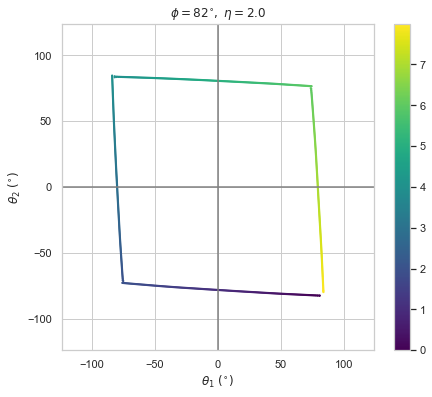

angle:1.51


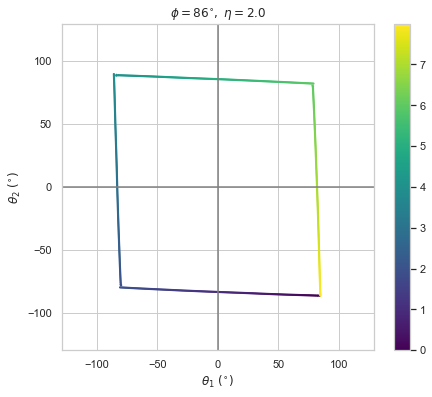

angle:1.57


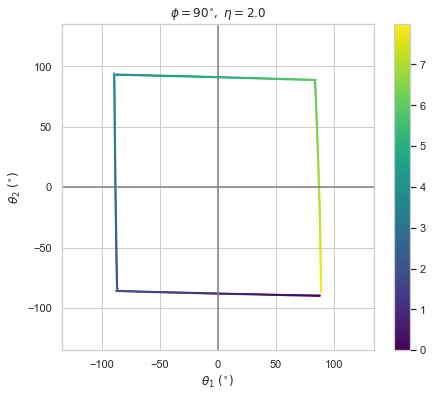

angle:0.07


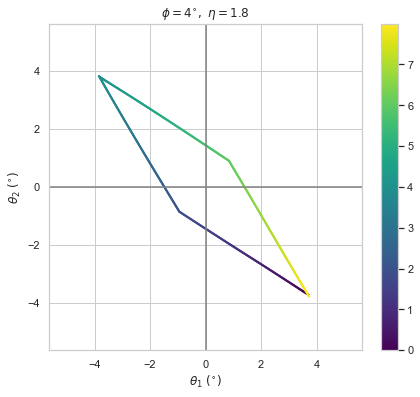

angle:0.13


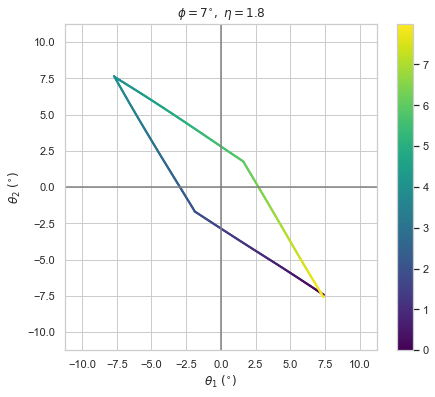

angle:0.2


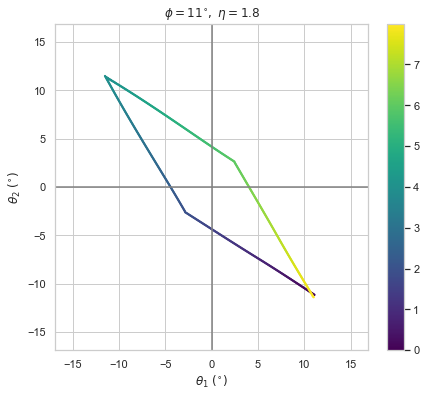

angle:0.26


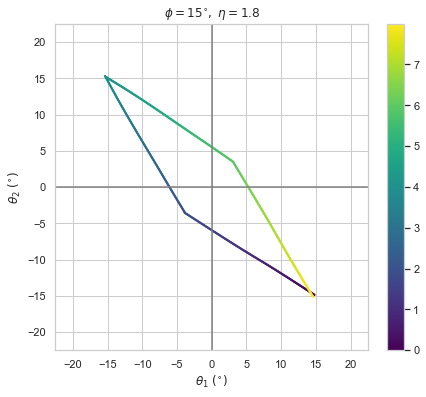

angle:0.33


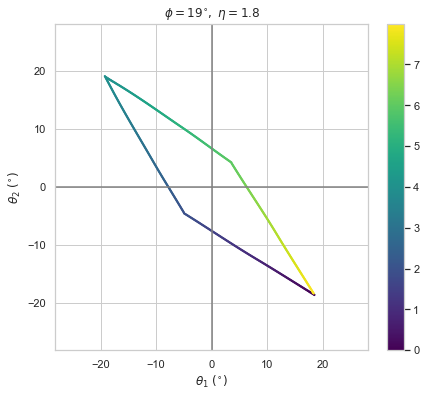

angle:0.39


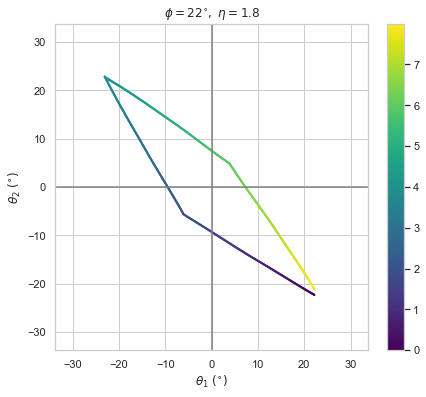

angle:0.46


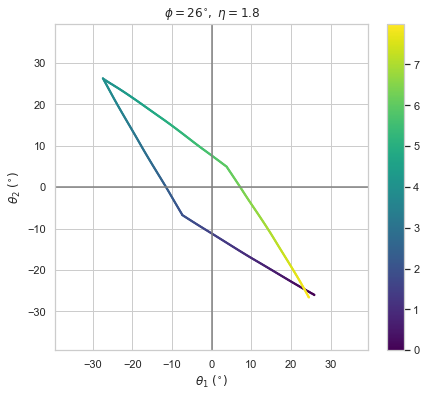

angle:0.52


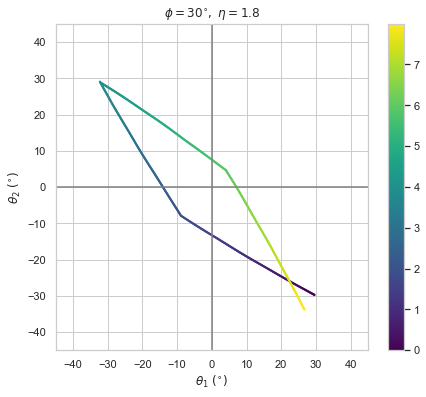

angle:0.59


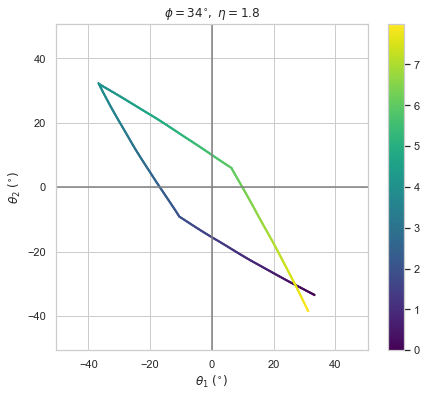

angle:0.65


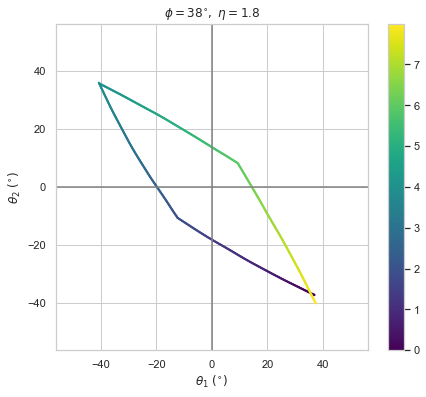

angle:0.72


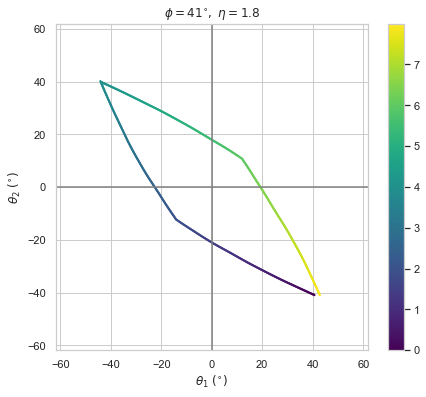

angle:0.79


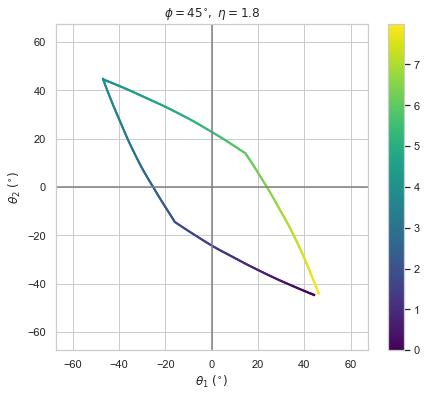

angle:0.85


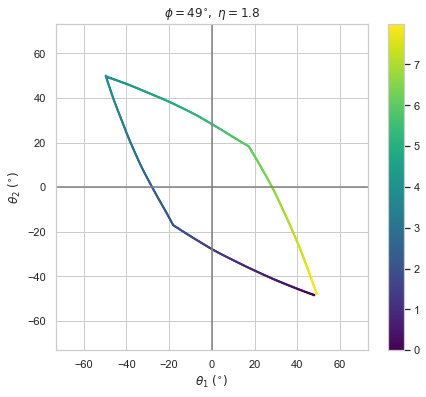

angle:0.92


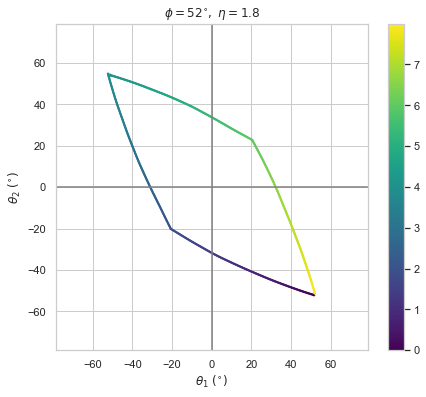

angle:0.98


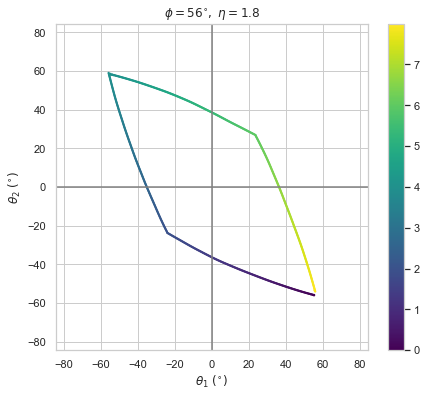

angle:1.05


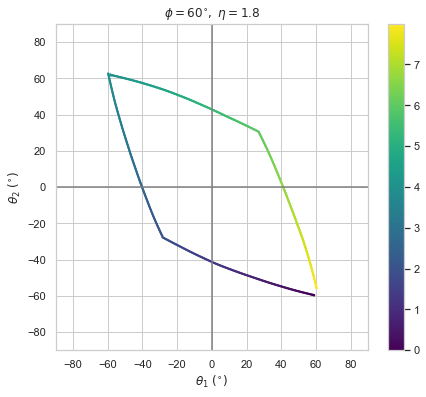

angle:1.11


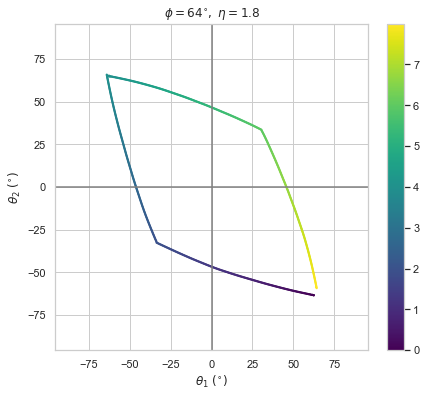

angle:1.18


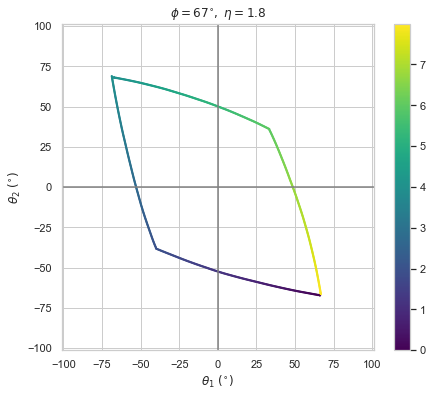

angle:1.24


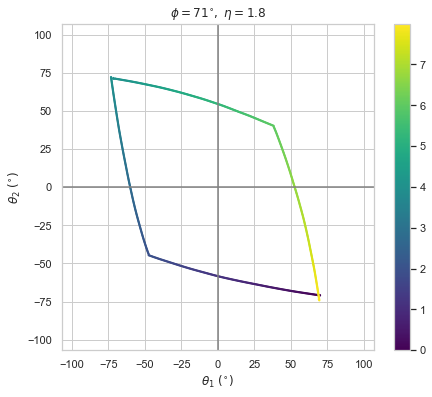

angle:1.31


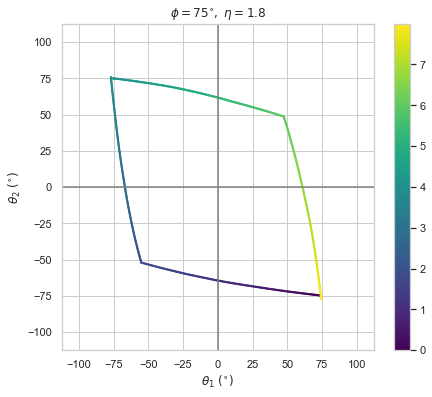

angle:1.37


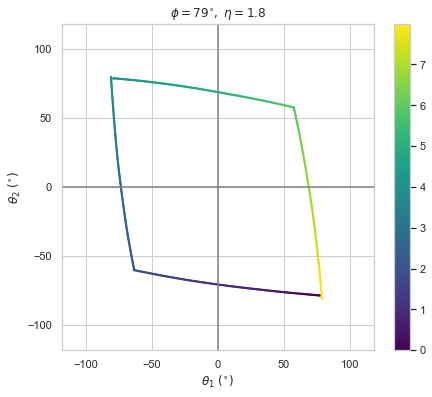

angle:1.44


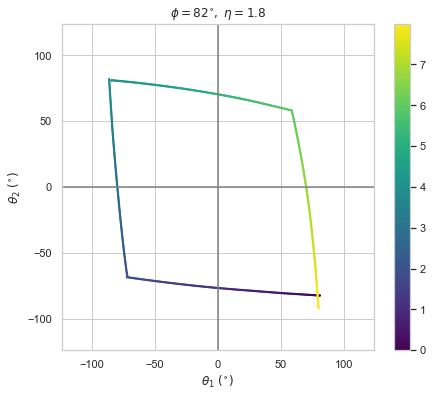

angle:1.51


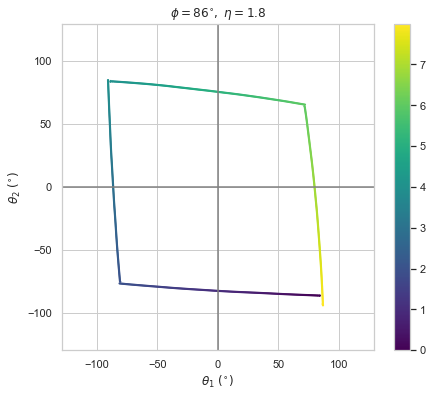

angle:1.57


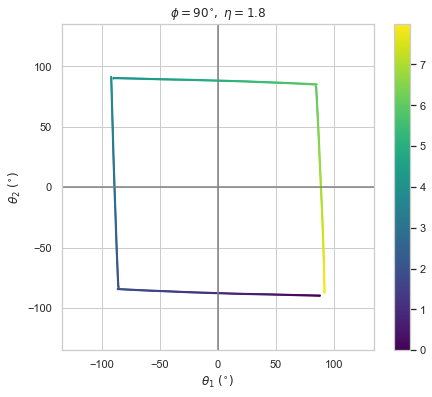

angle:0.07


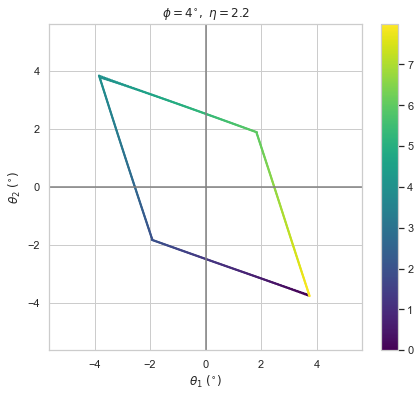

angle:0.13


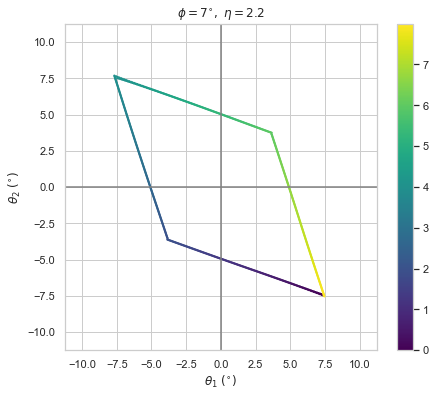

angle:0.2


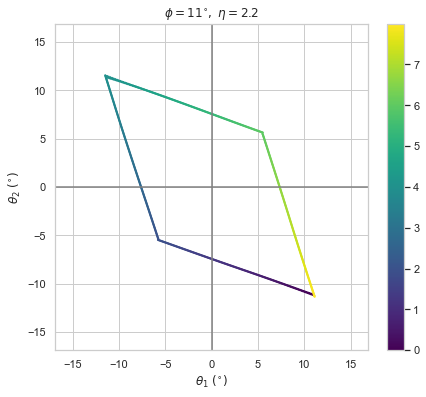

angle:0.26


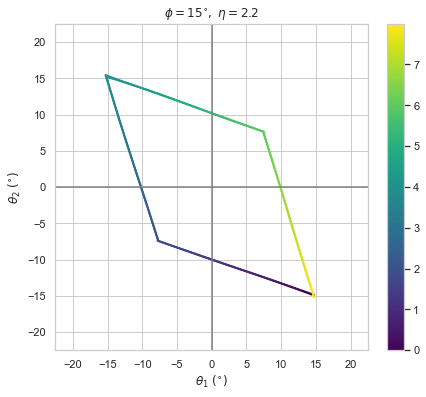

angle:0.33


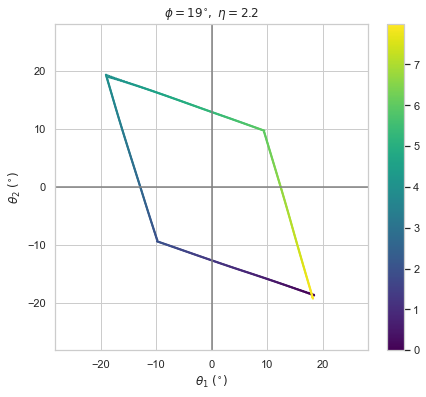

angle:0.39


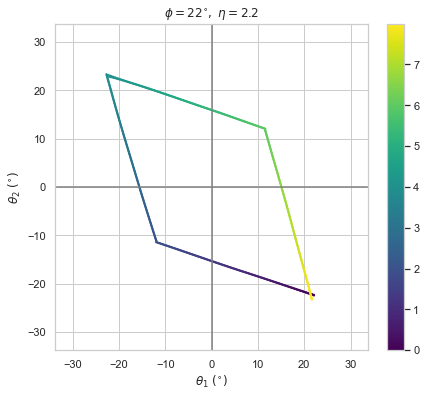

angle:0.46


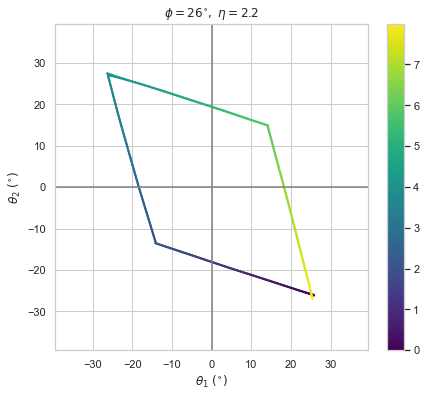

angle:0.52


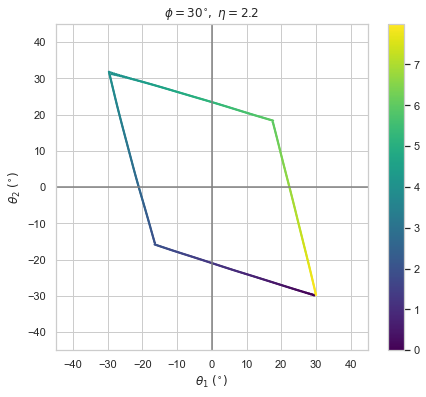

angle:0.59


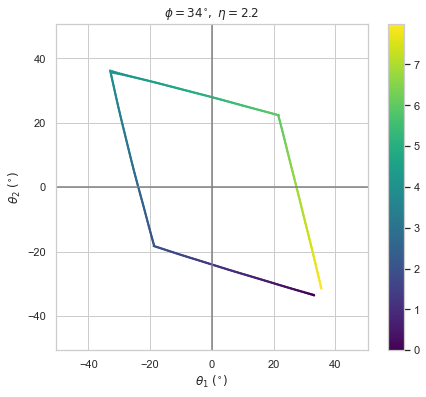

angle:0.65


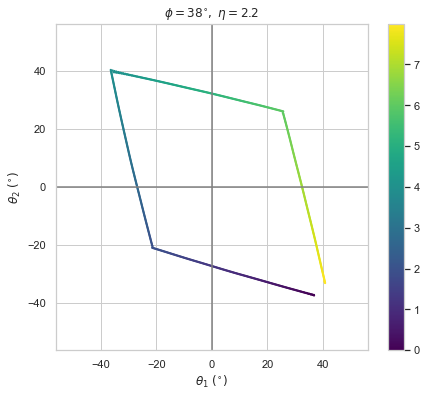

angle:0.72


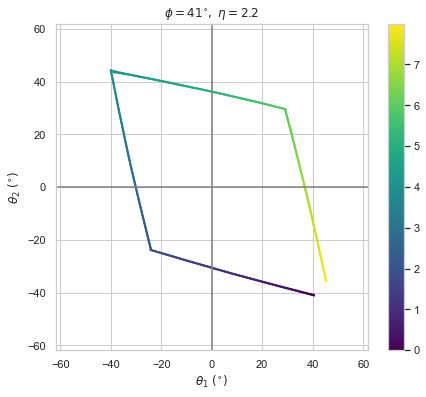

angle:0.79


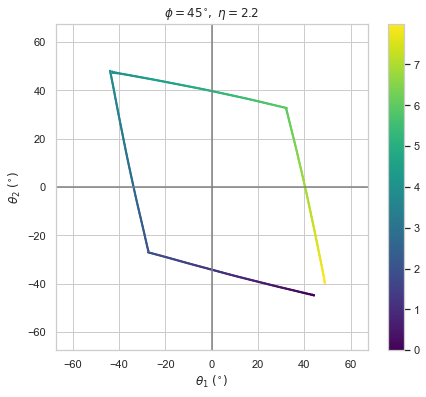

angle:0.85


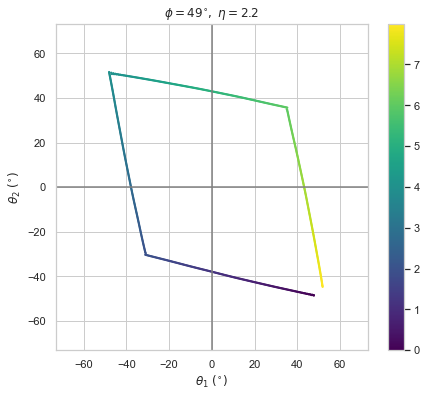

angle:0.92


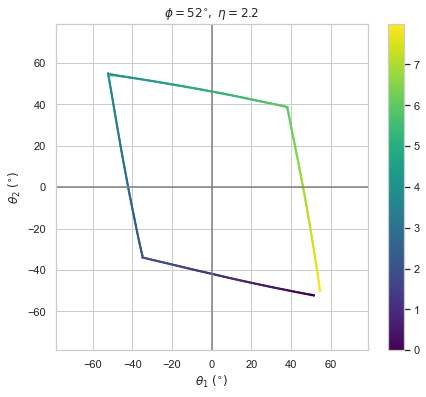

angle:0.98


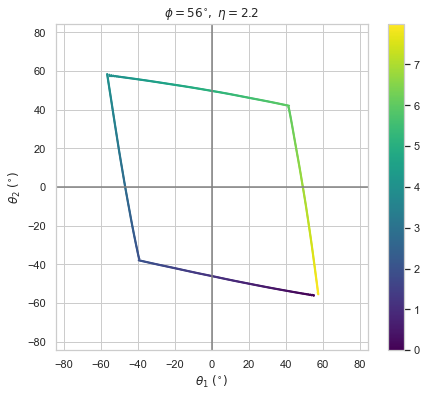

angle:1.05


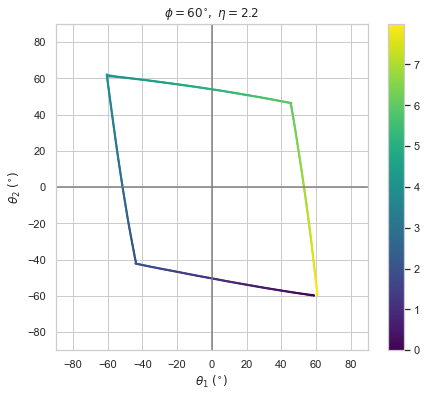

angle:1.11


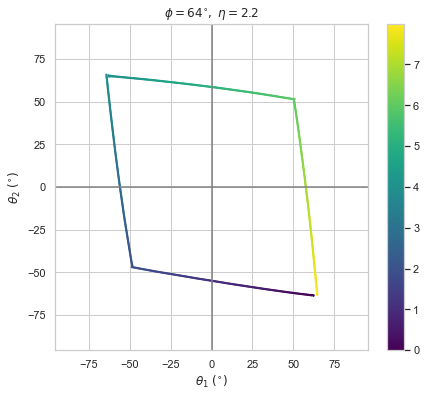

angle:1.18


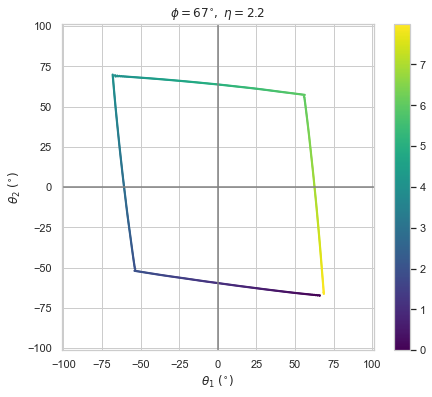

angle:1.24


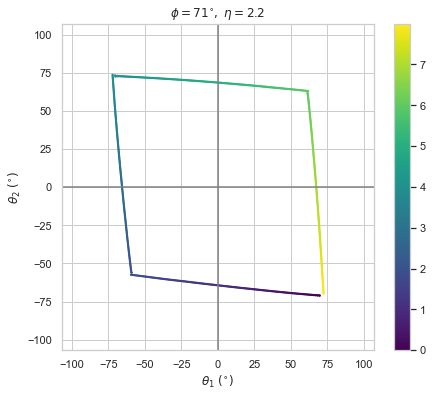

angle:1.31


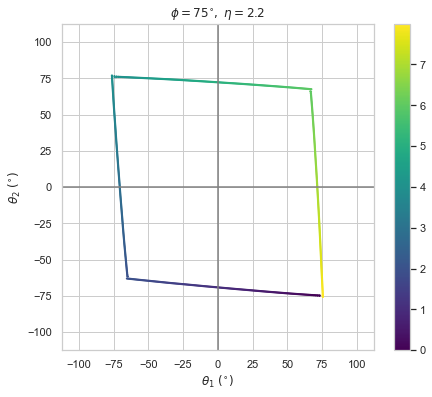

angle:1.37


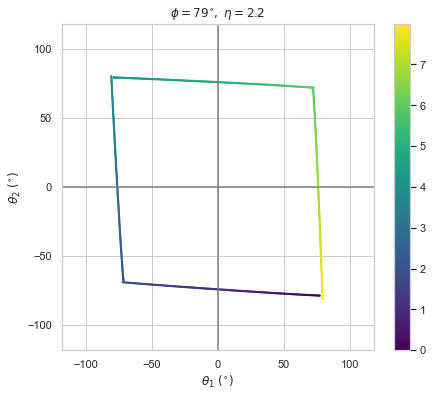

angle:1.44


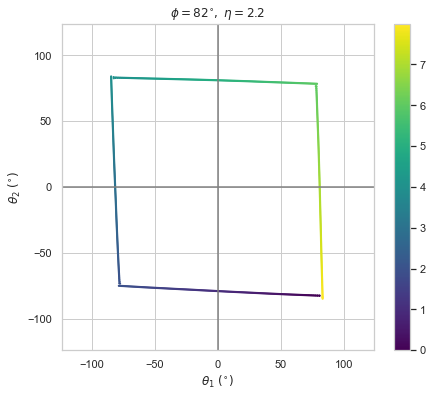

angle:1.51


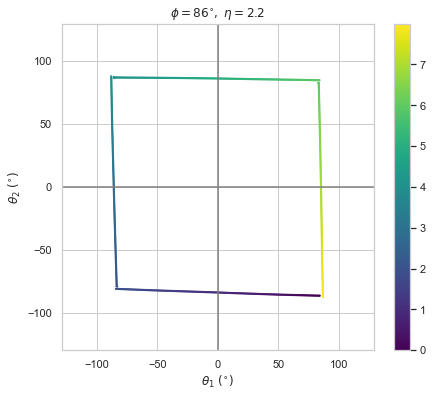

angle:1.57


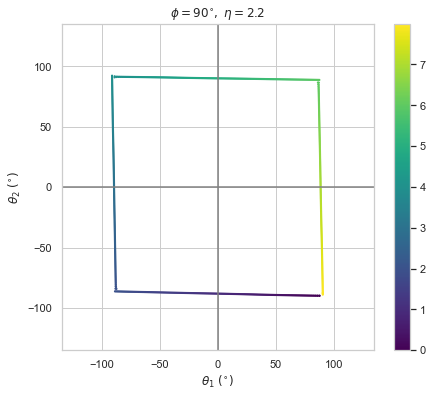

In [4]:
for eti in range(np.size(Eta)):
    
    #initial guess for P0 (based on preliminary experiments)
    expected = np.poly1d(pur.fit()[eti])
    
    for phi,ph in enumerate(Phi):
        print("angle:"+str(np.round(ph,2)))
        
        #maximum no. of iterations = 12 (analytical bound on bisection method)
        Tau.iloc[eti,phi] = np.round(sp.optimize.bisect(pur.P_minimizer,expected(Phi[phi])-0.2,
                                        expected(Phi[phi])+0.2,rtol=1e-4,args=(Eta[eti],Phi[phi])),4)
        
        #plot the Purcell Stroke
        s,r,tim = pur.init(Eta[eti],Phi[phi],T=8)
        tau = pur.stroke_input(Tau.iloc[eti,phi],tim,r,strokes=1)
        R = slts.mesher(np.arange(-1.5, 1.5, 0.1))
        _,pswimmer = slts.evolve(tau,tim,R,r,s,k=100,e=0.3,c=0.6)
        _,_ = pur.purcell_plot(pswimmer,tim,Phi[phi],Eta[eti],plot=True,save=True,figfile=figfile)

In [5]:
Tau.to_csv("P0.csv")